In [1]:
import params
from google.cloud import datastore, storage, logging
import time
import pickle
import hashlib
import sys
import numpy as np
import portfolio
import dataAck
import warnings
warnings.filterwarnings("ignore")
import portfolioGeneration
from IPython.display import display

In [2]:
modelHashes = portfolioGeneration.getAllPortfolioModels()

In [3]:
allModels = portfolio.getModelsByKey(modelHashes)

In [4]:
joinedData = portfolioGeneration.getPertinentDataForModels(allModels)

((5, ('TIP', 25, 9, 14, 1), 5, 'VGK'), 5, 300)
((44, ('XRT', 41, 19, None, 3), 10, 'XME'), 44, 150)
((5, ('EWC', 28, 16, 7, 3), 3, 'XME'), 5, 25)
((5, ('KBE', 17, None, None, 2), 10, 'XME'), 5, 25)
((44, ('ITB', 20, None, None, 2), 7, 'GDX'), 44, 25)
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150)
((22, ('XRT', 41, 19, None, 3), 10, 'XME'), 22, 150)
((22, ('TIP', 25, 9, 14, 1), 10, 'VGK'), 22, 25)
((5, ('IYR', 2, None, None, 1), 5, 'ILF'), 5, 25)
((10, ('RSP', 25, 6, None, 2), 5, 'GDX'), 10, 300)
((22, ('IYT', 17, 2, None, 2), 3, 'XME'), 22, 50)
((22, ('XLI', 17, 12, 18, 3), 3, 'XME'), 22, 100)
XME
ITB
GDX
XRT
KBE
TIP
ILF
VGK
EWC
IYT
XLI
IYR
RSP


In [5]:
##SHOULD BE NAN IN MANY SERIES...DON'T WANT TO UNNECESSARILY TRUNCATE
display(joinedData)

,Adj_Close_VGK,Adj_Close_TIP,Adj_Close_XME,Adj_Close_XRT,Adj_Close_EWC,Adj_Close_KBE,Adj_Close_GDX,Adj_Close_ITB,Adj_Close_ILF,Adj_Close_IYR,Adj_Close_RSP,Adj_Close_IYT,Adj_Close_XLI
Date,,,,,,,,,,,,,
1996-04-01,NaN,NaN,NaN,NaN,5.225239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-02,NaN,NaN,NaN,NaN,5.262232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-03,NaN,NaN,NaN,NaN,5.262232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-04,NaN,NaN,NaN,NaN,5.262232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-08,NaN,NaN,NaN,NaN,5.262232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-09,NaN,NaN,NaN,NaN,5.262232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-10,NaN,NaN,NaN,NaN,5.331985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-11,NaN,NaN,NaN,NaN,5.262232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-12,NaN,NaN,NaN,NaN,5.262232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
portfolioGeneration.generateRawPredictions(allModels, joinedData, daysBack = True)

((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) 1.0 2017-08-15 00:00:00
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) 0.0 2017-08-02 00:00:00
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) 0.0 2017-08-03 00:00:00
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) 0.0 2017-08-04 00:00:00
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) 0.0 2017-08-07 00:00:00
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) 0.0 2017-08-08 00:00:00
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) 0.0 2017-08-09 00:00:00
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) 0.0 2017-08-10 00:00:00
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) 0.0 2017-08-11 00:00:00
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) 0.0 2017-08-14 00:00:00
((5, ('IYR', 2, None, None, 1), 5, 'ILF'), 5, 25) -1.0 2017-08-15 00:00:00
((5, ('IYR', 2, None, None, 1), 5, 'ILF'), 5, 25) 1.0 2017-08-09 00:00:00
((5, ('IYR', 2, None, None, 1), 5, 'ILF'), 5, 25) -1.0 2017-08-10 00:00:00
((5, ('IYR', 2, None, None, 1), 5, '

In [7]:
##UPLOAD MODEL PREDICTIONS

In [7]:
##STORE TODAY AGGREGATE FOR ALL MODELS
def produceModelPredictions(allModels, joinedData):
    for model in allModels:
        todayAggregatePrediction = portfolio.getAggregatePredictionForModelDaily(model, joinedData)
        print(model.describe(), todayAggregatePrediction)
        if portfolio.getToday() == joinedData.index[-1]:
            print("SKIPPING UPLOAD, MUST WAIT UNTIL TOMORROW")
            continue
        
        portfolio.storeAggregateModelPrediction(model,\
                            todayAggregatePrediction, portfolio.getToday(), shouldReturn = False)

In [8]:
produceModelPredictions(allModels, joinedData)

((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150) -0.8
((5, ('IYR', 2, None, None, 1), 5, 'ILF'), 5, 25) -0.2
((22, ('IYT', 17, 2, None, 2), 3, 'XME'), 22, 50) 1.0
((5, ('TIP', 25, 9, 14, 1), 5, 'VGK'), 5, 300) -1.0
((22, ('TIP', 25, 9, 14, 1), 10, 'VGK'), 22, 25) 0.4
((44, ('XRT', 41, 19, None, 3), 10, 'XME'), 44, 150) 0.4
((22, ('XLI', 17, 12, 18, 3), 3, 'XME'), 22, 100) 1.0
((22, ('XRT', 41, 19, None, 3), 10, 'XME'), 22, 150) 0.0
((5, ('EWC', 28, 16, 7, 3), 3, 'XME'), 5, 25) -0.3333333333333333
((5, ('KBE', 17, None, None, 2), 10, 'XME'), 5, 25) 0.0
((44, ('ITB', 20, None, None, 2), 7, 'GDX'), 44, 25) 0.7142857142857143
((10, ('RSP', 25, 6, None, 2), 5, 'GDX'), 10, 300) -1.0


In [10]:
##UPLOAD PORTFOLIO PREDICTIONS

In [9]:
allPortfolios = portfolio.getPortfolios()

In [10]:
modelsInPortfolio = {}
portfolioTypes = {}
for portfolioInfo in allPortfolios:
    print(portfolioInfo)
    models = portfolio.getModelsByKey(portfolio.getPortfolioModels(portfolioInfo["key"]))
    modelsInPortfolio[portfolioInfo["key"]] = models
    portfolioTypes[portfolioInfo["key"]] = portfolioInfo["portfolioType"]
    
    for model in models:
        print(model.describe())

{'key': '62cd00ad573d7ec829b820da7cbc55a088f05541df3897b2ab571047', 'description': 'Simple Test GDX AND ILF HRP ALLOCATION vs SPY', 'benchmark': 'SPY', 'portfolioType': 'HRP'}
((5, ('IYR', 2, None, None, 1), 5, 'ILF'), 5, 25)
((44, ('ITB', 20, None, None, 2), 7, 'GDX'), 44, 25)
((10, ('RSP', 25, 6, None, 2), 5, 'GDX'), 10, 300)
{'key': '7c76373df7fc8e82ea6e123724190c0f69c0f25e169c139bf3093e6e', 'description': 'HIGH RELATIVE SHARPE ALLOCATION vs SPY', 'benchmark': 'SPY', 'portfolioType': 'EW By Ticker'}
((5, ('TIP', 25, 9, 14, 1), 5, 'VGK'), 5, 300)
((5, ('EWC', 28, 16, 7, 3), 3, 'XME'), 5, 25)
((22, ('XRT', 41, 19, None, 3), 10, 'XME'), 22, 150)
((22, ('XLI', 17, 12, 18, 3), 3, 'XME'), 22, 100)
((44, ('XRT', 41, 19, None, 3), 10, 'XME'), 44, 150)
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150)
((22, ('IYT', 17, 2, None, 2), 3, 'XME'), 22, 50)
((22, ('TIP', 25, 9, 14, 1), 10, 'VGK'), 22, 25)
((5, ('KBE', 17, None, None, 2), 10, 'XME'), 5, 25)
{'key': '968c884d6933dd4302238abe1b0e88ec9

In [11]:
print(allModels)

[<dataAck.algoBlob object at 0x7f0ba547e940>, <dataAck.algoBlob object at 0x7f0ba547eb00>, <dataAck.algoBlob object at 0x7f0ba547ec50>, <dataAck.algoBlob object at 0x7f0ba547eda0>, <dataAck.algoBlob object at 0x7f0ba53839e8>, <dataAck.algoBlob object at 0x7f0ba5383ac8>, <dataAck.algoBlob object at 0x7f0ba5383710>, <dataAck.algoBlob object at 0x7f0ba5383400>, <dataAck.algoBlob object at 0x7f0ba5383320>, <dataAck.algoBlob object at 0x7f0ba53830b8>, <dataAck.algoBlob object at 0x7f0ba53833c8>, <dataAck.algoBlob object at 0x7f0ba537ceb8>]


In [12]:
aggregateReturns, aggregatePredictions = portfolioGeneration.generateAggregateReturnsPredictions(allModels, joinedData)

In [13]:
display(aggregatePredictions)

,1e81d7ab58221a84ab2b5beff8dc4037158733b036d3e61427917b67,9a56476c4e41144c3e4841bac0683a63fdf583c849328c2ef733c841,6b1052e31ed14173b646a9d4cfd942d2439d7eaf19634d900785a2a0,8a29d2ff4eb6c69b07b9f895a9fb54ff7c211152a69b284af48bc780,85b8af878af9f1625e0ad42bd132ecc3b6dfc42764f8b8150272eee2,e01883a35e1a85df844eb09fa09244b1646c01f0f0eb953e1c26413c,43b82397f03341692c8167a264422c295b817c6251490db92125aa0c,5b02076b09bf6fd98b7328d489e91a40f8269c910f9a099784c7e2a1,8ca0ff9d4dc792576647cb4e9c86784df53f01bf8556535d950bb094,9ef7410299afb662c4c52426c6315956a2414567a55a337a35caabbd,38f8f2e7b8ac6b3156fad0936a4ab7ede129d8e8f851ddaa6e08ff91,bafd4b91d4b571903d2a3bbd461626181e266e3e59ac41f501cdfb8a
2009-05-19,0.562500,0.375,0.50,1.0000,0.207031,NaN,0.50,-0.001953,0.500000,NaN,0.187500,0.8750
2009-05-20,0.580078,0.250,0.00,1.0000,0.152344,NaN,0.00,-0.003906,0.500000,NaN,0.093750,0.7500
2009-05-21,0.601562,0.125,0.00,1.0000,0.101562,NaN,-0.50,-0.005859,0.000000,NaN,-0.062500,0.6250
2009-05-22,0.611328,0.125,0.00,1.0000,0.042969,NaN,-1.00,-0.009766,-0.500000,NaN,-0.187500,0.3750
2009-05-26,0.615234,-0.125,0.00,1.0000,-0.003906,NaN,-0.50,-0.013672,0.000000,NaN,-0.281250,0.1250
2009-05-27,0.617188,-0.250,0.00,1.0000,-0.050781,NaN,0.00,-0.019531,0.000000,NaN,-0.437500,-0.1250
2009-05-28,0.607422,-0.375,-0.50,1.0000,-0.093750,NaN,0.50,-0.027344,0.500000,NaN,-0.562500,-0.3750
2009-05-29,0.593750,-0.375,-0.50,1.0000,-0.121094,NaN,1.00,-0.037109,0.500000,NaN,-0.656250,-0.6250
2009-06-01,0.578125,-0.375,-0.25,1.0000,-0.148438,NaN,1.00,-0.048828,0.000000,NaN,-0.750000,-0.7500
2009-06-02,0.554688,-0.500,-0.25,1.0000,-0.167969,NaN,1.00,-0.064453,-0.500000,NaN,-0.843750,-0.8750


In [16]:
##GENERATE WEIGHTS FOR PORTFOLIO TODAY
import pandas as pd
allocationsToStore = []
for portfolioKey in modelsInPortfolio:
    historicalWeights = None
    if portfolioTypes[portfolioKey] == "HRP":
        print("HRP")
        hrpReturns, historicalWeights = portfolioGeneration.produceHRPPredictions(aggregateReturns[[portfolio.getModelHash(model) for model in modelsInPortfolio[portfolioKey]]], 22, startIndex=3, maxWindowSize=True)
    elif portfolioTypes[portfolioKey] == "EW":
        print("EW")
        thisReturns = aggregateReturns[[portfolio.getModelHash(model) for model in modelsInPortfolio[portfolioKey]]]
        historicalWeights = pd.DataFrame(thisReturns.apply(lambda x: [1.0/len(x) for item in x], axis=1), columns=thisReturns.columns.values)
    elif portfolioTypes[portfolioKey] == "EW By Ticker":
        print("EW By Ticker")
        thisReturns = aggregateReturns[[portfolio.getModelHash(model) for model in modelsInPortfolio[portfolioKey]]]
        keptModels = []
        for mod in allModels:
            if portfolio.getModelHash(mod) in thisReturns.columns:
                keptModels.append(mod)
        weightArray = portfolioGeneration.getWeightingForAlgos(keptModels, thisReturns.columns)
        historicalWeights = pd.DataFrame(thisReturns.apply(lambda x: weightArray, axis=1), columns=thisReturns.columns.values)
    print(portfolioKey, historicalWeights.iloc[-1])
    todayWeight = historicalWeights.iloc[-1]
    netPosition = {}
    transformedAlgoPrediction = {}
    for model in modelsInPortfolio[portfolioKey]:
        if model.inputSeries.targetTicker not in netPosition:
            netPosition[model.inputSeries.targetTicker] = 0.0
        netPosition[model.inputSeries.targetTicker] += todayWeight[portfolio.getModelHash(model)] * portfolio.getAggregatePredictionForModelDaily(model, joinedData)
        transformedAlgoPrediction[portfolio.getModelHash(model)] = todayWeight[portfolio.getModelHash(model)] * portfolio.getAggregatePredictionForModelDaily(model, joinedData)
    print(portfolioKey, netPosition)
    allocationsToStore.append(portfolioGeneration.storePortfolioAllocation(portfolioKey, portfolio.getToday(), todayWeight.to_dict(), netPosition, transformedAlgoPrediction, shouldReturn=True))
portfolio.storeManyItems(allocationsToStore)

HRP
62cd00ad573d7ec829b820da7cbc55a088f05541df3897b2ab571047 38f8f2e7b8ac6b3156fad0936a4ab7ede129d8e8f851ddaa6e08ff91    0.688825
9a56476c4e41144c3e4841bac0683a63fdf583c849328c2ef733c841    0.234227
bafd4b91d4b571903d2a3bbd461626181e266e3e59ac41f501cdfb8a    0.076948
Name: 2017-07-31 00:00:00, dtype: float64
62cd00ad573d7ec829b820da7cbc55a088f05541df3897b2ab571047 {'ILF': -0.046845433843787698, 'GDX': 0.41507053888255158}
EW By Ticker
7c76373df7fc8e82ea6e123724190c0f69c0f25e169c139bf3093e6e 8a29d2ff4eb6c69b07b9f895a9fb54ff7c211152a69b284af48bc780    0.250000
8ca0ff9d4dc792576647cb4e9c86784df53f01bf8556535d950bb094    0.071429
5b02076b09bf6fd98b7328d489e91a40f8269c910f9a099784c7e2a1    0.071429
43b82397f03341692c8167a264422c295b817c6251490db92125aa0c    0.071429
e01883a35e1a85df844eb09fa09244b1646c01f0f0eb953e1c26413c    0.071429
1e81d7ab58221a84ab2b5beff8dc4037158733b036d3e61427917b67    0.071429
6b1052e31ed14173b646a9d4cfd942d2439d7eaf19634d900785a2a0    0.071429
85b8af878af9f1625e0ad

In [17]:
##UPDATE CACHE
portfolioInfos = []
for portfolioHash in modelsInPortfolio:
    portfolioInfo = portfolio.getPortfolioByKey(portfolioHash)
    portfolioInfo = {
        "key":portfolioInfo.key.name,
        "description":portfolioInfo["description"],
        "benchmark":portfolioInfo["benchmark"],
        "portfolioType":portfolioInfo["portfolioType"],
    }
    print(portfolioInfo)
    portfolioInfos.append(portfolioInfo)

##GET ALL BENCHMARKS
benchmarksNeeded = []
print(joinedData.columns.values)
for info in portfolioInfos:
    print(info["benchmark"])
    if info["benchmark"] not in benchmarksNeeded and ("Adj_Close_" + info["benchmark"] not in joinedData.columns.values):
        benchmarksNeeded.append(info["benchmark"])
print("BENCHMARKS NEEDED", benchmarksNeeded)
pulledData, unused_ = dataAck.downloadTickerData(benchmarksNeeded)
thisJoinedData = joinedData
for ticker in pulledData:
    thisJoinedData = joinedData.join(pulledData[ticker], how='outer')

for info in portfolioInfos:
    portfolioHash = info["key"]
    print(portfolioHash)
    portfolioData = portfolioGeneration.getDataForPortfolio(portfolioHash, portfolioInfo["benchmark"], thisJoinedData)
    portfolioGeneration.cachePortfolio(info, portfolioData, "Available")

{'key': '62cd00ad573d7ec829b820da7cbc55a088f05541df3897b2ab571047', 'description': 'Simple Test GDX AND ILF HRP ALLOCATION vs SPY', 'benchmark': 'SPY', 'portfolioType': 'HRP'}
{'key': '7c76373df7fc8e82ea6e123724190c0f69c0f25e169c139bf3093e6e', 'description': 'HIGH RELATIVE SHARPE ALLOCATION vs SPY', 'benchmark': 'SPY', 'portfolioType': 'EW By Ticker'}
{'key': '968c884d6933dd4302238abe1b0e88ec9fd50df37c68cd9ea03eab59', 'description': 'Simple Test GDX AND ILF EW ALLOCATION vs SPY', 'benchmark': 'SPY', 'portfolioType': 'EW'}
{'key': 'e4999e0aabce6c5261a9409057fe20f04037e4d2f90a2b0961032716', 'description': 'HIGH RELATIVE SHARPE ALLOCATION vs SPY', 'benchmark': 'SPY', 'portfolioType': 'EW'}
['Adj_Close_XME' 'Adj_Close_EWC' 'Adj_Close_ILF' 'Adj_Close_IYR'
 'Adj_Close_IYT' 'Adj_Close_VGK' 'Adj_Close_TIP' 'Adj_Close_XRT'
 'Adj_Close_XLI' 'Adj_Close_KBE' 'Adj_Close_GDX' 'Adj_Close_ITB'
 'Adj_Close_RSP']
SPY
SPY
SPY
SPY
BENCHMARKS NEEDED ['SPY']
SPY
62cd00ad573d7ec829b820da7cbc55a088f05541df389

In [8]:
## UPDATE CACHE FOR TRADING PORTFOLIOS
portfolioInfos = []
downloadedPortfolioInfo = portfolioGeneration.getTradingPortfolioHashes(includeDates = True)
for tradingPortfolio in downloadedPortfolioInfo:
    portfolioHash = tradingPortfolio
    portfolioInfo = portfolio.getPortfolioByKey(portfolioHash)
    portfolioInfo = {
        "key":portfolioInfo.key.name,
        "description":portfolioInfo["description"],
        "benchmark":portfolioInfo["benchmark"],
        "portfolioType":portfolioInfo["portfolioType"],
        "startedTrading":downloadedPortfolioInfo[portfolioHash]
    }
    print(portfolioInfo)
    portfolioInfos.append(portfolioInfo)

##GET ALL BENCHMARKS
benchmarksNeeded = []
print(joinedData.columns.values)
for info in portfolioInfos:
    print(info["benchmark"])
    if info["benchmark"] not in benchmarksNeeded and ("Adj_Close_" + info["benchmark"] not in joinedData.columns.values):
        benchmarksNeeded.append(info["benchmark"])
print("BENCHMARKS NEEDED", benchmarksNeeded)
pulledData, unused_ = dataAck.downloadTickerData(benchmarksNeeded)
thisJoinedData = joinedData
for ticker in pulledData:
    thisJoinedData = joinedData.join(pulledData[ticker], how='outer')

for info in portfolioInfos:
    portfolioHash = info["key"]
    print(portfolioHash)
    portfolioData = portfolioGeneration.getDataForPortfolio(portfolioHash, portfolioInfo["benchmark"], thisJoinedData, recentStartDate = portfolioInfo["startedTrading"])
    portfolioGeneration.cachePortfolio(info, portfolioData, "Trading")




{'key': '7c76373df7fc8e82ea6e123724190c0f69c0f25e169c139bf3093e6e', 'description': 'HIGH RELATIVE SHARPE ALLOCATION vs SPY', 'benchmark': 'SPY', 'portfolioType': 'EW By Ticker', 'startedTrading': datetime.datetime(2017, 8, 16, 0, 0, tzinfo=<UTC>)}
['Adj_Close_VGK' 'Adj_Close_TIP' 'Adj_Close_XME' 'Adj_Close_XRT'
 'Adj_Close_EWC' 'Adj_Close_KBE' 'Adj_Close_GDX' 'Adj_Close_ITB'
 'Adj_Close_ILF' 'Adj_Close_IYR' 'Adj_Close_RSP' 'Adj_Close_IYT'
 'Adj_Close_XLI']
SPY
BENCHMARKS NEEDED ['SPY']
SPY
7c76373df7fc8e82ea6e123724190c0f69c0f25e169c139bf3093e6e
((44, ('XRT', 41, 19, None, 3), 10, 'XME'), 44, 150)
((22, ('XLI', 17, 12, 18, 3), 3, 'XME'), 22, 100)
((22, ('IYT', 17, 2, None, 2), 3, 'XME'), 22, 50)
((5, ('KBE', 17, None, None, 2), 10, 'XME'), 5, 25)
((10, ('EWC', 28, 16, 7, 3), 10, 'XME'), 10, 150)
((5, ('EWC', 28, 16, 7, 3), 3, 'XME'), 5, 25)
((22, ('TIP', 25, 9, 14, 1), 10, 'VGK'), 22, 25)
((5, ('TIP', 25, 9, 14, 1), 5, 'VGK'), 5, 300)
((22, ('XRT', 41, 19, None, 3), 10, 'XME'), 22, 150

In [8]:
portfolioGeneration.fetchPortfolioInfo("7c76373df7fc8e82ea6e123724190c0f69c0f25e169c139bf3093e6e", "Available")

{'algoSharpe': 1.214820822186369,
 'alpha': 5.071131857563689,
 'annualReturn': 9.873276067711,
 'annualVolatility': 8.016030043938606,
 'benchmark': 'SPY',
 'beta': 0.31311098266920834,
 'description': 'HIGH RELATIVE SHARPE ALLOCATION vs SPY',
 'key': '7c76373df7fc8e82ea6e123724190c0f69c0f25e169c139bf3093e6e',
 'portfolioType': 'EW By Ticker',
 'recentAlpha': 5.0176483010688955,
 'recentBeta': 0.2483549614139211,
 'recentReturn': 5.676954028671277,
 'recentSharpe': 3.447750855997853}

# CALCULATE FUND PERFORMANCE METRICS

In [14]:
def cleanupAllocations(allocations):
    allocationsToReturn = {}
    for tradeDay in allocations:
        totalAllocation = sum([abs(allocations[tradeDay][ticker]) for ticker in allocations[tradeDay]])
        
        allocationsToReturn[tradeDay] = {}
        for ticker in allocations[tradeDay]:
            allocationsToReturn[tradeDay][ticker] = allocations[tradeDay][ticker]/totalAllocation
    
    return allocationsToReturn
        
    

In [25]:
import pandas as pd
def createAllocationsTable(scaledAllocations):
    allocationsTable = pd.DataFrame([])
    for allocationDay in scaledAllocations:
        keysInRow = list(scaledAllocations[allocationDay].keys())
        allocationsTable = pd.concat([allocationsTable, pd.DataFrame([[scaledAllocations[allocationDay][key] for key in keysInRow]], index = [allocationDay], columns=keysInRow).tz_localize(None)])
    return allocationsTable.sort_index().fillna(0)

In [26]:
def getNetAllocationAcrossPortfolios():
    portfolioInfos = []
    downloadedPortfolioInfo = portfolioGeneration.getTradingPortfolioHashes(includeDates = True)
    for tradingPortfolio in downloadedPortfolioInfo:
        portfolioHash = tradingPortfolio
        portfolioInfo = portfolio.getPortfolioByKey(portfolioHash)
        portfolioInfo = {
            "key":portfolioInfo.key.name,
            "description":portfolioInfo["description"],
            "benchmark":portfolioInfo["benchmark"],
            "portfolioType":portfolioInfo["portfolioType"],
            "startedTrading":downloadedPortfolioInfo[portfolioHash]
        }
        print(portfolioInfo)
        portfolioInfos.append(portfolioInfo)

    #DAILY ALLOCATIONS MUST ONLY GET ALLOCATIONS FOR PORTFOLIO AFTER START DATE FOR PORTFOLIO
    
    totalDesired = {}
    historicalAllocations = {}
    realizedAllocations = {}
    for tradingPortfolio in portfolioInfos:
        portfolioHash = tradingPortfolio["key"]
        allAllocations = portfolio.getPortfolioAllocations(portfolioHash)
        
        
        for item in allAllocations:
            netPosition = {}
            for key in item:
                if key.startswith("ticker_"):
                    netPosition[key[len("ticker_"):]] = item[key]
            
            ##REALIZED ALLOCATIONS
            if item["predictionDay"] >= tradingPortfolio["startedTrading"]:
                if item["predictionDay"] not in realizedAllocations:
                    realizedAllocations[item["predictionDay"]] = {}
                for ticker in netPosition:
                    if ticker not in realizedAllocations[item["predictionDay"]]:
                        realizedAllocations[item["predictionDay"]][ticker] = 0.0
                    realizedAllocations[item["predictionDay"]][ticker] += netPosition[ticker]
            
            if item["predictionDay"] not in historicalAllocations:
                historicalAllocations[item["predictionDay"]] = {}
            for ticker in netPosition:
                if ticker not in historicalAllocations[item["predictionDay"]]:
                    historicalAllocations[item["predictionDay"]][ticker] = 0.0
                historicalAllocations[item["predictionDay"]][ticker] += netPosition[ticker]
    
    
    ##CLEANUP ALLOCATIONS TO SCALE TO CAPITAL 1
    realizedAllocations = createAllocationsTable(cleanupAllocations(realizedAllocations))
    historicalAllocations = createAllocationsTable(cleanupAllocations(historicalAllocations))       
    return historicalAllocations, realizedAllocations
    

In [27]:
historicalAllocations, realizedAllocations =  getNetAllocationAcrossPortfolios()

{'key': '7c76373df7fc8e82ea6e123724190c0f69c0f25e169c139bf3093e6e', 'description': 'HIGH RELATIVE SHARPE ALLOCATION vs SPY', 'benchmark': 'SPY', 'portfolioType': 'EW By Ticker', 'startedTrading': datetime.datetime(2017, 8, 16, 0, 0, tzinfo=<UTC>)}


In [32]:
pulledData, unused_ = dataAck.downloadTickerData(historicalAllocations.columns.values)
allocationJoinedData = dataAck.joinDatasets([pulledData[ticker] for ticker in pulledData])

XME
VGK


In [95]:
def estimateTransactionCost(allocationsTable, joinedData):
    commissionPerTransaction = 0.002
    allocationChanges = allocationsTable.diff(1)
    allocationChanges[0:1] = allocationsTable[0:1] ##ABSORB FULL CHANGE ON FIRST DAY
    allocationChanges = allocationChanges.apply(lambda x:[abs(item * commissionPerTransaction) for item in x], axis=1)

    return allocationChanges
    

In [96]:
def calculatePerformanceForAllocations(allocations, joinedData):
    rawAllocationPerformance = portfolioGeneration.calculatePerformanceForTable(allocations, allocations.columns, joinedData)
    estimatedTransactionCost = estimateTransactionCost(allocations, joinedData)
    allocationPerformance = rawAllocationPerformance - estimatedTransactionCost
    return allocationPerformance, pd.DataFrame(allocationPerformance.apply(lambda x: sum(x), axis=1), columns = ["Fund Return"]),\
        pd.DataFrame(estimatedTransactionCost.apply(lambda x: sum(x), axis=1), columns=["Fund Transaction Cost"])


In [97]:
performanceByTicker, fundPerformance, fundTransactionCost = calculatePerformanceForAllocations(historicalAllocations, allocationJoinedData)

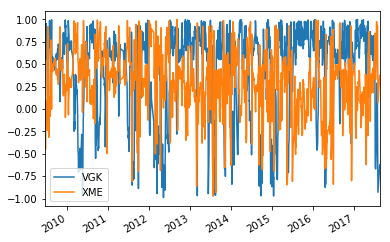

In [101]:
historicalAllocations.plot()

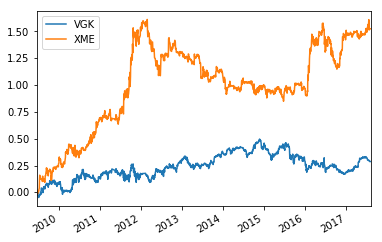

In [98]:
import empyrical
%matplotlib inline
empyrical.cum_returns(performanceByTicker).plot()

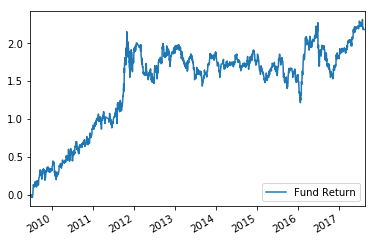

In [99]:
empyrical.cum_returns(fundPerformance).plot()

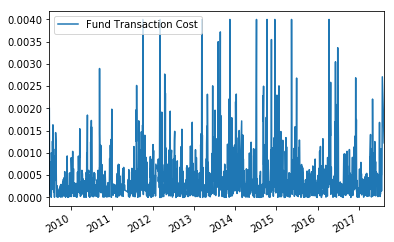

In [100]:
fundTransactionCost.plot()